<a href="https://colab.research.google.com/github/nehaa28/JulyTask/blob/main/Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Observe and document the use of various loss functions.

**Loss function** is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. An optimization problem seeks to minimize a loss function.

In statistics, typically a loss function is used for parameter estimation, and the event in question is some function of the difference between estimated and true values for an instance of data.

**What’s the Difference between a Loss Function and a Cost Function?**
I want to emphasize this here –  although cost function and loss function are synonymous and used interchangeably, they are different.

A loss function is for a single training example. It is also sometimes called an error function. A cost function, on the other hand, is the average loss over the entire training dataset. The optimization strategies aim at minimizing the cost function.

Various loss functions used in machine learning are :

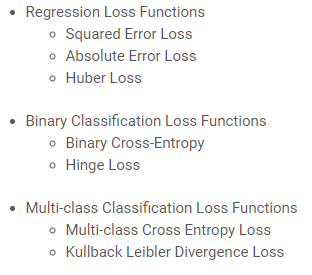

There’s no one-size-fits-all loss function to algorithms in machine learning. There are various factors involved in choosing a loss function for specific problem such as 
* type of machine learning algorithm chosen
* ease of calculating the derivatives
* to some degree the percentage of outliers in the data set.

Broadly, loss functions can be classified into two major categories depending upon the type of learning task we are dealing with — Regression losses and Classification losses. 
* In classification, we are trying to predict output from set of finite categorical values i.e Given large data set of images of hand written digits, categorizing them into one of 0–9 digits. 
* Regression, on the other hand, deals with predicting a continuous value for example given floor area, number of rooms, size of rooms, predict the price of room.

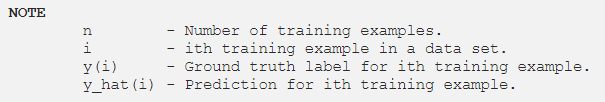

# Regression Losses
**Mean Square Error/Quadratic Loss/L2 Loss**
Mathematical formulation :-

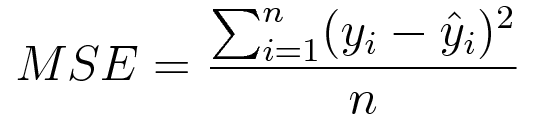

MSE is the average of squared difference between predictions and actual observations. However, due to squaring, predictions which are far away from actual values are penalized heavily in comparison to less deviated predictions.


In [1]:
import numpy as np
y_hat = np.array([0.000, 0.166, 0.333])
y_true = np.array([0.000, 0.254, 0.998])
def rmse(predictions, targets):
    differences = predictions - targets
    differences_squared = differences ** 2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_val
print("d is: " + str(["%.8f" % elem for elem in y_hat]))
print("p is: " + str(["%.8f" % elem for elem in y_true]))
rmse_val = rmse(y_hat, y_true)
print("rms error is: " + str(rmse_val))

d is: ['0.00000000', '0.16600000', '0.33300000']
p is: ['0.00000000', '0.25400000', '0.99800000']
rms error is: 0.3872849941150143


# Mean Absolute Error/L1 Loss

Mean absolute error, on the other hand, is measured as the average of sum of absolute differences between predictions and actual observations. Unlike MSE, MAE needs more complicated tools such as linear programming to compute the gradients. Plus MAE is more robust to outliers since it does not make use of square.

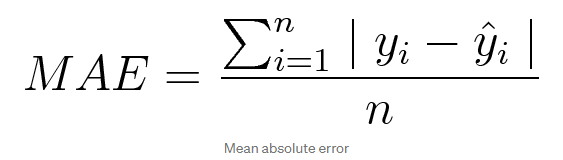

In [2]:
import numpy as np
y_hat = np.array([0.000, 0.166, 0.333])
y_true = np.array([0.000, 0.254, 0.998])

print("d is: " + str(["%.8f" % elem for elem in y_hat]))
print("p is: " + str(["%.8f" % elem for elem in y_true]))

def mae(predictions, targets):
    differences = predictions - targets
    absolute_differences = np.absolute(differences)
    mean_absolute_differences = absolute_differences.mean()
    return mean_absolute_differences
mae_val = mae(y_hat, y_true)
print ("mae error is: " + str(mae_val))

d is: ['0.00000000', '0.16600000', '0.33300000']
p is: ['0.00000000', '0.25400000', '0.99800000']
mae error is: 0.251


# Mean Bias Error

This is much less common in machine learning domain as compared to it’s counterpart. This is same as MSE with the only difference that we don’t take absolute values. Clearly there’s a need for caution as positive and negative errors could cancel each other out. Although less accurate in practice, it could determine if the model has positive bias or negative bias.

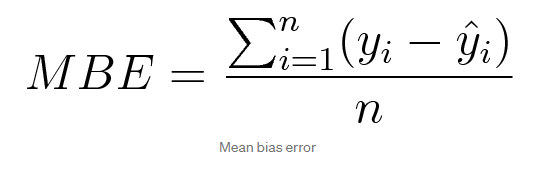

# Classification Losses
**Hinge Loss/Multi class SVM Loss**

In simple terms, the score of correct category should be greater than sum of scores of all incorrect categories by some safety margin (usually one). And hence hinge loss is used for maximum-margin classification, most notably for support vector machines. Although not differentiable, it’s a convex function which makes it easy to work with usual convex optimizers used in machine learning domain.

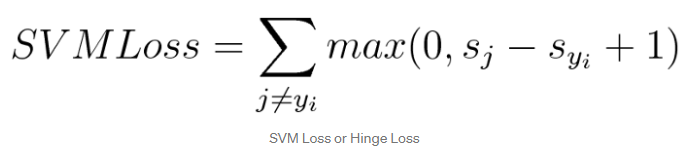



#Cross Entropy Loss/Negative Log Likelihood

This is the most common setting for classification problems. Cross-entropy loss increases as the predicted probability diverges from the actual label.

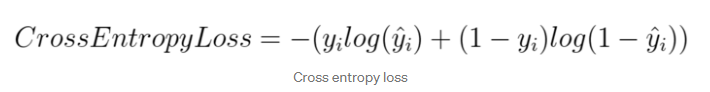

Notice that when actual label is 1 (y(i) = 1), second half of function disappears whereas in case actual label is 0 (y(i) = 0) first half is dropped off. In short, we are just multiplying the log of the actual predicted probability for the ground truth class. An important aspect of this is that cross entropy loss penalizes heavily the predictions that are confident but wrong.

In [3]:
import numpy as np
predictions = np.array([[0.25,0.25,0.25,0.25],
                        [0.01,0.01,0.01,0.96]])
targets = np.array([[0,0,0,1],
                   [0,0,0,1]])
def cross_entropy(predictions, targets, epsilon=1e-10):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce_loss = -np.sum(np.sum(targets * np.log(predictions + 1e-5)))/N
    return ce_loss
cross_entropy_loss = cross_entropy(predictions, targets)
print ("Cross entropy loss is: " + str(cross_entropy_loss))

Cross entropy loss is: 0.7135329699138555


#Huber
Typically used for regression. It’s less sensitive to outliers than the MSE as it treats error as square only inside an interval.

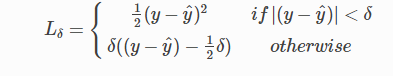




In [4]:
def Huber(yHat, y, delta=1.):
    return np.where(np.abs(y-yHat) < delta,.5*(y-yHat)**2 , delta*(np.abs(y-yHat)-0.5*delta))

In [5]:
#Kullback-Leibler
def KLDivergence(yHat, y):
    """
    :param yHat:
    :param y:
    :return: KLDiv(yHat || y)
    """
    return np.sum(yHat * np.log((yHat / y)))

# Observe and document results before and after applying various regularisation techniques like l1, l2, and dropout techniques

**What is regularisation?**
Regularization is a set of techniques that can prevent overfitting in neural networks and thus improve the accuracy of a Deep Learning model when facing completely new data from the problem domain. 

Overfitting refers to the phenomenon where a neural network models the training data very well but fails when it sees new data from the same problem domain. Overfitting is caused by noise in the training data that the neural network picks up during training and learns it as an underlying concept of the data.

**Why does the neural network picks up that noise in the first place?**
The reason for this is that the complexity of this network is too high. A fit of a neural network with higher complexity is shown in the image on the right-hand side.

There are three very popular and efficient regularization techniques called L1, L2, and dropout as discussed below:

#L2 Regularization
The L2 regularization is the most common type of all regularization techniques and is also commonly known as weight decay or Ridge Regression.

During the L2 regularization the loss function of the neural network as extended by a so-called regularization term, which is called here Ω.

The regularization term Ω is defined as the Euclidean Norm (or L2 norm) of the weight matrices, which is the sum over all squared weight values of a weight matrix. The regularization term is weighted by the scalar alpha divided by two and added to the regular loss function that is chosen for the current task. This leads to a new expression for the loss function:

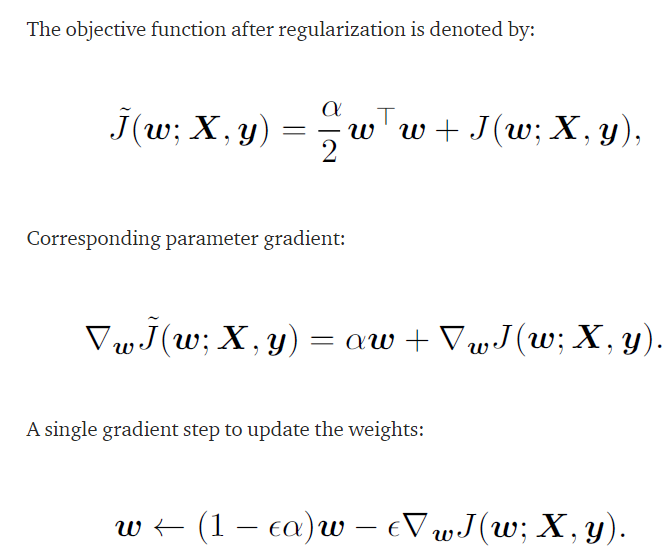

Alpha is sometimes called as the regularization rate and is an additional hyperparameter we introduce into the neural network. Simply speaking alpha determines how much we regularize our model.









In [6]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext tensorboard

In [7]:
layer = tf.keras.layers.Dense(100, activation="elu",
                          kernel_initializer="he_normal",
                          kernel_regularizer=tf.keras.regularizers.l2(0.01))
#The l2() function returns a regularizer that will be called to compute the regularization loss, at each step during training. 
#This regularization loss is then added to the final loss.
#regularization factor = 0.01


#L1 Regularization
Here the regularization term is defined as:

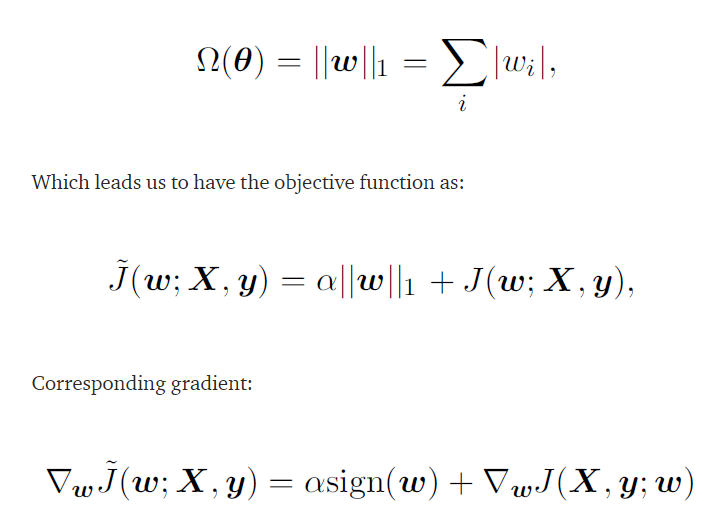



In [8]:
layer = tf.keras.layers.Dense(100, activation="elu",
                          kernel_initializer="he_normal",
                          kernel_regularizer=tf.keras.regularizers.l1(0.01))
#The l2() function returns a regularizer that will be called to compute the regularization loss, at each step during training. 
#This regularization loss is then added to the final loss.
#regularization factor = 0.01


#What does L1 and L2 Regularization achieve?
* Performing L2 regularization encourages the weight values towards zero (but not exactly zero)
* Performing L1 regularization encourages the weight values to be zero

Intuitively speaking smaller weights reduce the impact of the hidden neurons. In that case, those hidden neurons become neglectable and the overall complexity of the neural network gets reduced.

As mentioned earlier: less complex models typically avoid modeling noise in the data, and therefore, there is no overfitting.

When choosing the regularization term α. The goal is to strike the right balance between low complexity of the model and accuracy
* If your alpha value is too high, your model will be simple, but you run the risk of *underfitting* your data. Your model won’t learn enough about the training data to make useful predictions.
* If your alpha value is too low, your model will be more complex, and you run the risk of *overfitting* your data. Your model will learn too much about the particularities of the training data, and won’t be able to generalize to new data.



#Dropout
In addition to the L2 and L1 regularization, another famous and powerful regularization technique is called the dropout regularization. The procedure behind dropout regularization is quite simple.

In a nutshell, dropout means that during training with some probability P a neuron of the neural network gets turned off during training. Let’s look at a visual example.

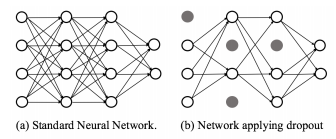

So each iteration has a different set of nodes and this results in a different set of outputs. It can also be thought of as an ensemble technique in machine learning.

This probability of choosing how many nodes should be dropped is the hyperparameter of the dropout function. Dropout can be applied to both the hidden layers as well as the input layers.



In [9]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dropout(rate=0.2),
tf.keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
tf.keras.layers.Dropout(rate=0.2),
tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
tf.keras.layers.Dropout(rate=0.2),
tf.keras.layers.Dense(10, activation="softmax")
])

In [10]:
#Implementation of reglarization techniques using MNIST data with keras

%pylab inline

import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score

from matplotlib import pyplot

import tensorflow as tf
import keras

# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

Populating the interactive namespace from numpy and matplotlib


In [11]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
# import keras modules
from keras.models import Sequential
from keras.layers import Dense

In [13]:
tf.random.set_seed(42)
np.random.seed(42)

model_A = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation="softmax")])

model_A.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

model_A.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________

In [14]:
history = model_A.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), verbose=2)

Epoch 1/10
1719/1719 - 5s - loss: 1.5275 - accuracy: 0.5970 - val_loss: 0.9444 - val_accuracy: 0.7980
Epoch 2/10
1719/1719 - 4s - loss: 0.7465 - accuracy: 0.8287 - val_loss: 0.5868 - val_accuracy: 0.8596
Epoch 3/10
1719/1719 - 4s - loss: 0.5412 - accuracy: 0.8624 - val_loss: 0.4685 - val_accuracy: 0.8834
Epoch 4/10
1719/1719 - 4s - loss: 0.4591 - accuracy: 0.8771 - val_loss: 0.4104 - val_accuracy: 0.8940
Epoch 5/10
1719/1719 - 4s - loss: 0.4142 - accuracy: 0.8869 - val_loss: 0.3758 - val_accuracy: 0.9006
Epoch 6/10
1719/1719 - 4s - loss: 0.3852 - accuracy: 0.8938 - val_loss: 0.3525 - val_accuracy: 0.9052
Epoch 7/10
1719/1719 - 4s - loss: 0.3644 - accuracy: 0.8980 - val_loss: 0.3348 - val_accuracy: 0.9102
Epoch 8/10
1719/1719 - 4s - loss: 0.3485 - accuracy: 0.9021 - val_loss: 0.3209 - val_accuracy: 0.9138
Epoch 9/10
1719/1719 - 4s - loss: 0.3356 - accuracy: 0.9053 - val_loss: 0.3111 - val_accuracy: 0.9152
Epoch 10/10
1719/1719 - 4s - loss: 0.3251 - accuracy: 0.9077 - val_loss: 0.3016 - 

In [15]:
from functools import partial
RegularizedDense = partial(tf.keras.layers.Dense, activation="elu", kernel_initializer="he_normal",
                            kernel_regularizer=keras.regularizers.l2(0.00001))
model_l2 = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
RegularizedDense(300),
RegularizedDense(100),
RegularizedDense(100),
RegularizedDense(10, activation="softmax",
kernel_initializer="glorot_uniform")
])

In [16]:
model_l2.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

model_l2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 276,710
Trainable params: 276,710
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model_l2.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), verbose=2)

Epoch 1/10
1719/1719 - 6s - loss: 1.1446 - accuracy: 0.6897 - val_loss: 0.6120 - val_accuracy: 0.8490
Epoch 2/10
1719/1719 - 5s - loss: 0.5392 - accuracy: 0.8575 - val_loss: 0.4439 - val_accuracy: 0.8832
Epoch 3/10
1719/1719 - 5s - loss: 0.4374 - accuracy: 0.8804 - val_loss: 0.3833 - val_accuracy: 0.8968
Epoch 4/10
1719/1719 - 5s - loss: 0.3903 - accuracy: 0.8923 - val_loss: 0.3497 - val_accuracy: 0.9036
Epoch 5/10
1719/1719 - 5s - loss: 0.3614 - accuracy: 0.8995 - val_loss: 0.3277 - val_accuracy: 0.9088
Epoch 6/10
1719/1719 - 5s - loss: 0.3409 - accuracy: 0.9055 - val_loss: 0.3119 - val_accuracy: 0.9136
Epoch 7/10
1719/1719 - 5s - loss: 0.3249 - accuracy: 0.9092 - val_loss: 0.2989 - val_accuracy: 0.9170
Epoch 8/10
1719/1719 - 5s - loss: 0.3119 - accuracy: 0.9131 - val_loss: 0.2877 - val_accuracy: 0.9224
Epoch 9/10
1719/1719 - 5s - loss: 0.3006 - accuracy: 0.9163 - val_loss: 0.2793 - val_accuracy: 0.9244
Epoch 10/10
1719/1719 - 5s - loss: 0.2909 - accuracy: 0.9196 - val_loss: 0.2705 - 

In [18]:
model_l2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2735 - accuracy: 0.9236


[0.2735210061073303, 0.9236000180244446]

In [19]:
model_A.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.9158


[0.30552420020103455, 0.9157999753952026]

In [20]:
from functools import partial
RegularizedDense = partial(tf.keras.layers.Dense, activation="elu", kernel_initializer="he_normal",
                            kernel_regularizer=keras.regularizers.l1(0.00005))
model_l1 = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
RegularizedDense(300),
RegularizedDense(100),
RegularizedDense(100),
RegularizedDense(10, activation="softmax",
kernel_initializer="glorot_uniform")
])

In [21]:
model_l1.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

model_l1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 276,710
Trainable params: 276,710
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model_l1.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), verbose=2)

Epoch 1/10
1719/1719 - 6s - loss: 1.6539 - accuracy: 0.7226 - val_loss: 1.2276 - val_accuracy: 0.8542
Epoch 2/10
1719/1719 - 5s - loss: 1.1550 - accuracy: 0.8667 - val_loss: 1.0754 - val_accuracy: 0.8858
Epoch 3/10
1719/1719 - 5s - loss: 1.0623 - accuracy: 0.8869 - val_loss: 1.0161 - val_accuracy: 0.8992
Epoch 4/10
1719/1719 - 5s - loss: 1.0183 - accuracy: 0.8970 - val_loss: 0.9828 - val_accuracy: 0.9058
Epoch 5/10
1719/1719 - 5s - loss: 0.9911 - accuracy: 0.9032 - val_loss: 0.9606 - val_accuracy: 0.9110
Epoch 6/10
1719/1719 - 5s - loss: 0.9716 - accuracy: 0.9082 - val_loss: 0.9441 - val_accuracy: 0.9158
Epoch 7/10
1719/1719 - 5s - loss: 0.9563 - accuracy: 0.9120 - val_loss: 0.9307 - val_accuracy: 0.9196
Epoch 8/10
1719/1719 - 5s - loss: 0.9437 - accuracy: 0.9153 - val_loss: 0.9197 - val_accuracy: 0.9248
Epoch 9/10
1719/1719 - 5s - loss: 0.9329 - accuracy: 0.9180 - val_loss: 0.9110 - val_accuracy: 0.9260
Epoch 10/10
1719/1719 - 5s - loss: 0.9234 - accuracy: 0.9205 - val_loss: 0.9022 - 

In [23]:
model_l1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9113 - accuracy: 0.9232


[0.9112964868545532, 0.9232000112533569]

In [24]:
model_dropout = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dropout(rate=0.2),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dropout(rate=0.2),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dropout(rate=0.2),
tf.keras.layers.Dense(10, activation="softmax")
])

In [25]:
model_dropout.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

model_dropout.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [26]:
history = model_dropout.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), verbose=2)


Epoch 1/10
1719/1719 - 5s - loss: 1.9435 - accuracy: 0.3851 - val_loss: 1.3520 - val_accuracy: 0.7610
Epoch 2/10
1719/1719 - 4s - loss: 1.2027 - accuracy: 0.6676 - val_loss: 0.7648 - val_accuracy: 0.8342
Epoch 3/10
1719/1719 - 4s - loss: 0.8709 - accuracy: 0.7424 - val_loss: 0.5690 - val_accuracy: 0.8628
Epoch 4/10
1719/1719 - 4s - loss: 0.7302 - accuracy: 0.7781 - val_loss: 0.4788 - val_accuracy: 0.8780
Epoch 5/10
1719/1719 - 5s - loss: 0.6540 - accuracy: 0.7997 - val_loss: 0.4288 - val_accuracy: 0.8866
Epoch 6/10
1719/1719 - 5s - loss: 0.6006 - accuracy: 0.8144 - val_loss: 0.3954 - val_accuracy: 0.8942
Epoch 7/10
1719/1719 - 5s - loss: 0.5640 - accuracy: 0.8271 - val_loss: 0.3701 - val_accuracy: 0.8982
Epoch 8/10
1719/1719 - 5s - loss: 0.5348 - accuracy: 0.8360 - val_loss: 0.3505 - val_accuracy: 0.9022
Epoch 9/10
1719/1719 - 5s - loss: 0.5162 - accuracy: 0.8412 - val_loss: 0.3375 - val_accuracy: 0.9048
Epoch 10/10
1719/1719 - 5s - loss: 0.4931 - accuracy: 0.8499 - val_loss: 0.3233 - 

In [27]:
model_dropout.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.9091


[0.3256179690361023, 0.9090999960899353]

#CONCLUSION

Adding regularization to model, as shown in above coDE, helped to increase accuracy and reduce loss. Using hyperparameter tuning, more accuracy may be achieved to get better results.
